<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

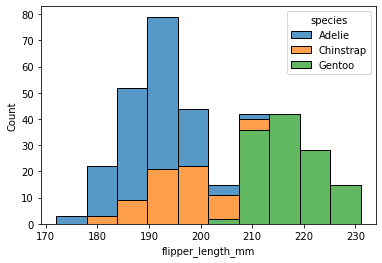

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#histplot Plot univariate or bivariate histograms to show distributions of datasets
#distributionplot

#defines functions that specialize in representing the distribution of datapoints. This includes familiar methods like the histogram:



<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

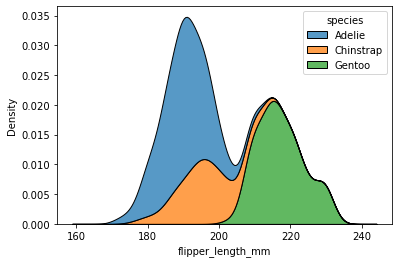

In [2]:
#kerneydensityestimation
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [3]:
 #axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In [4]:
# axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

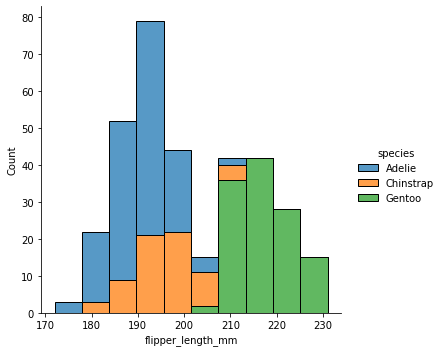

In [5]:
#displot() is the figure-level function for the distributions module. It's
#default behavior is to draw a histogram, using the the same code as 
#histplot()  behind the secenes

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [6]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

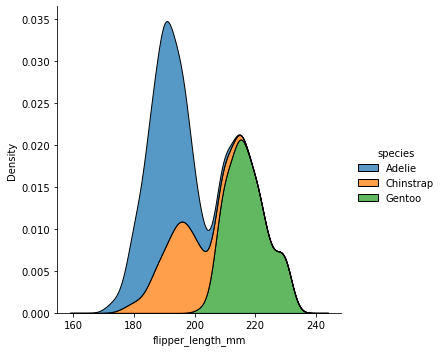

In [7]:
#to draw a kernel density plot instead, using the same code as kdeplot(), select
#it using the kind parameter:

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

In [8]:
#differences between axes-level & figure-level
#legend placed outside the plot
#slightly different shap
#figure-level functions can create multiple subplots
#can "facet" them by plotting each distrubtiuon across the columns of the figure:


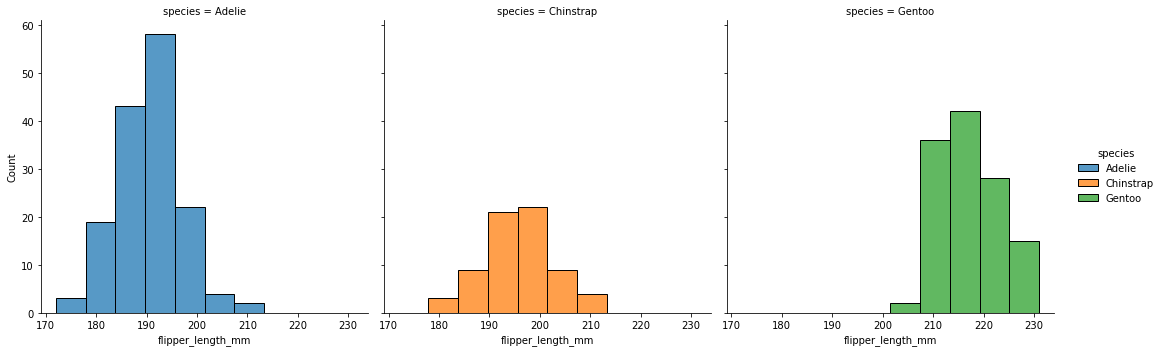

In [9]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")


In [10]:
#The figure-level functions wrap their axes-level counterparts and pass the kind-specific keyword arguments (such as the bin size for a histogram) down to the underlying function. That means they are no less flexible, but there is a downside: the kind-specific parameters don’t appear in the function signature or docstrings. Some of their features might be less discoverable, and you may need to look at two different pages of the documentation before understanding how to achieve a specific goal

In [11]:
#The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

#The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

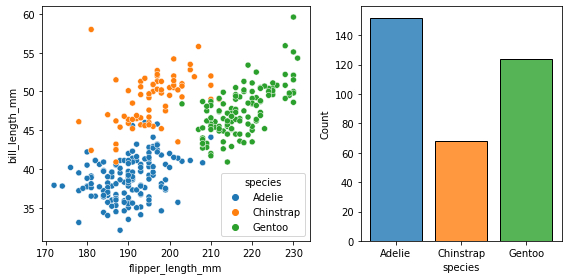

In [12]:
import matplotlib as plt
import matplotlib.pyplot as plt

f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

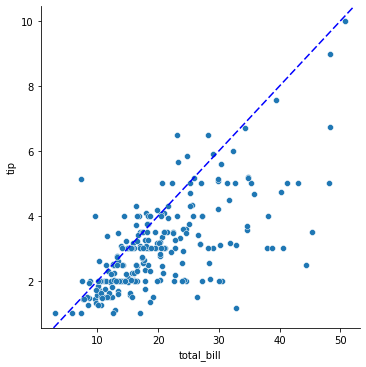

In [13]:
#In contrast, figure-level functions cannot (easily) be composed with other plots.
#By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

#Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

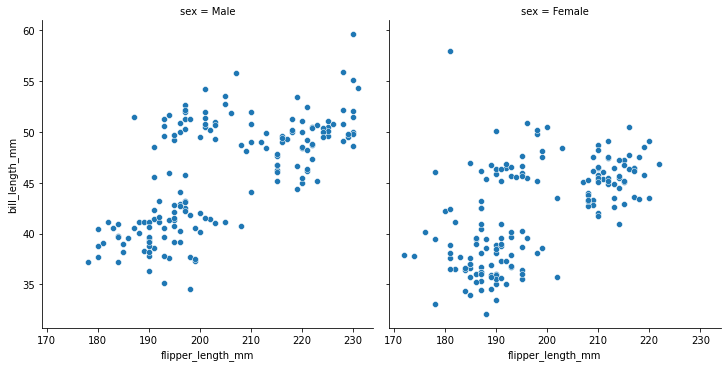

In [15]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

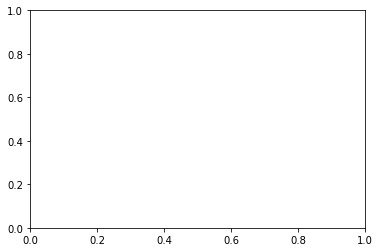

In [17]:
#default output of matplotlib.pyplot.subplots()
f, ax = plt.subplots()


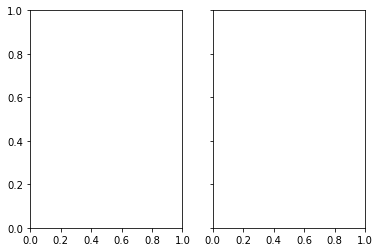

In [16]:
#a figure with multiple columns will have the same overall size but the
#axes will be squeezed horizontally to fit in the space
f, ax = plt.subplots(1, 2, sharey= True)


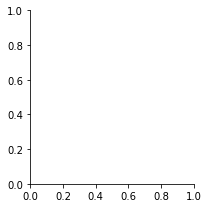

In [18]:
#inn contrast a plot created by a figure-level function will be square. To demonstrate
# lets set up an emplty plot using FacetGrid directly. Happens behind the scenes in functions like relplot(0, displot(), catplot()

g = sns.FacetGrid(penguins)


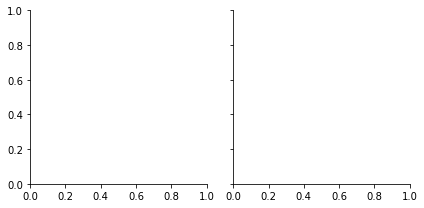

In [19]:
#when additional columns are added, the figure itself will become wider, so that its subplots
#have the same size and shape:

g = sns.FacetGrid(penguins, col="sex")

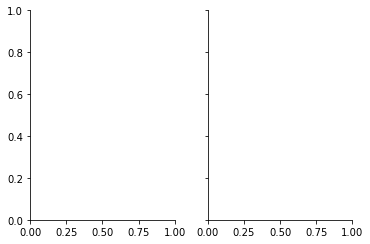

In [20]:
#you can adjust the size and shape of each subplot without accounting for the total number
#of rows and columbs in the figure.

g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)



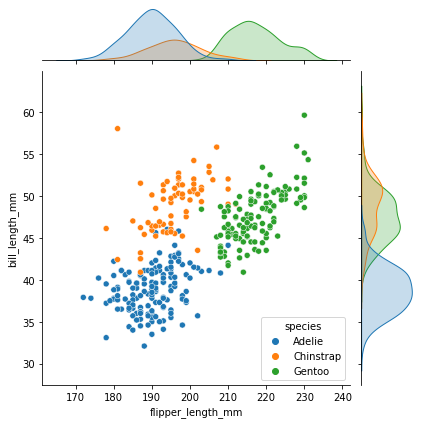

In [21]:
#Jointplot(0 and pairplot do fint cleanly in normal classification scheme
#jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

sns.jointplot(data = penguins, x ="flipper_length_mm", y = "bill_length_mm", hue= "species")



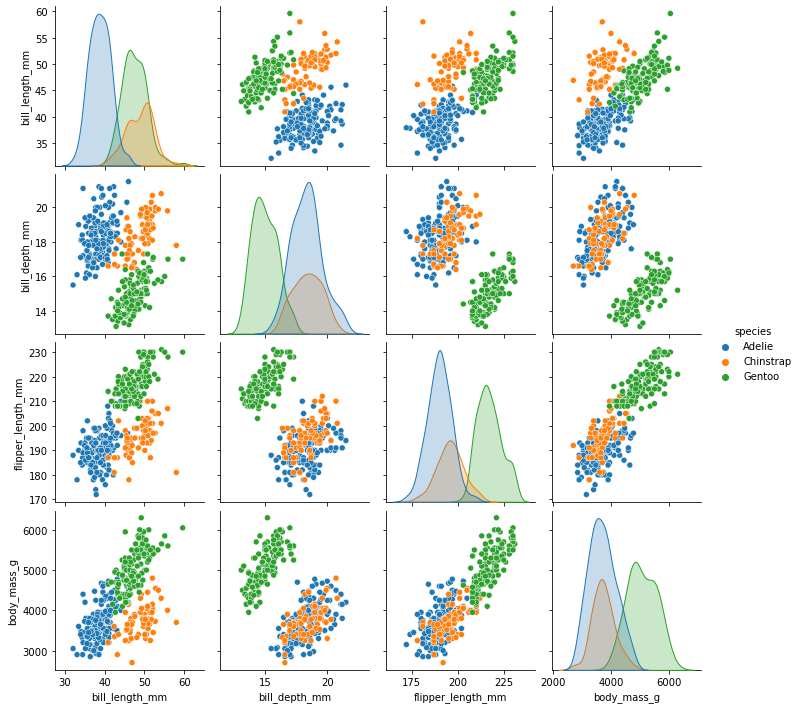

In [23]:
#pairplot() is similar - it combines join and marginnal views - but rather than focus
#on  a single relationship, it visualizes every pairwise combination of variables simulataneously

sns.pairplot(data= penguins, hue= "species")

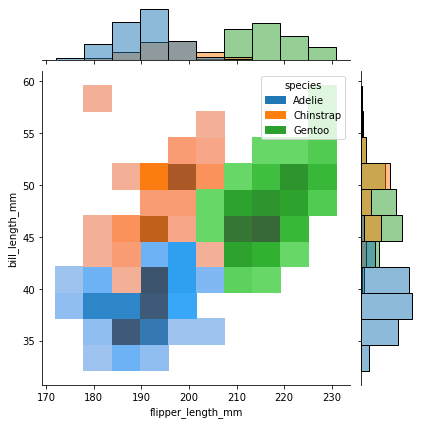

In [24]:
sns.jointplot(data = penguins, x="flipper_length_mm", y  ="bill_length_mm", hue ="species", kind="hist")